# Classification

**PERCEPTRON:** a computer model or computerized machine devised to represent or <br>
    simulate the ability of the brain to recognize and discriminate.

# tu gote balunga toka

## Heaviside Step Function
<pre>
g(x) = 1, x > 0
       0, elsewhere
</pre>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],
                  'grumpy_proportion':[0.1,0.6,0.2,0.9],
                  'prediction':['kitten','kitten','kitten','adult']})
df

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


In [3]:
kittens = df[df['prediction']=='kitten']
adults = df[df['prediction']=='adult']

print(kittens,'\n')
print(adults)

   sleep_proportion  grumpy_proportion prediction
0               0.2                0.1     kitten
1               0.4                0.6     kitten
2               0.5                0.2     kitten 

   sleep_proportion  grumpy_proportion prediction
3               0.7                0.9      adult


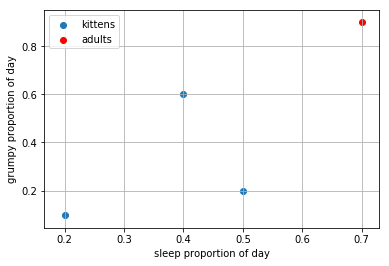

In [4]:
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'], label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'], c='r',label='adults')

plt.xlabel('sleep proportion of day')
plt.ylabel('grumpy proportion of day')
plt.legend()
plt.grid()
plt.show()

In [5]:
df['bprediction'] = df['prediction'].apply(lambda x:x == 'kitten')
print(df)
from sklearn.linear_model import Perceptron

classifier = Perceptron(max_iter=100)

model = classifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])

   sleep_proportion  grumpy_proportion prediction  bprediction
0               0.2                0.1     kitten         True
1               0.4                0.6     kitten         True
2               0.5                0.2     kitten         True
3               0.7                0.9      adult        False


## Predict

In [6]:
print(model.predict([[1.2,1.1]]))
print(model.predict([[0.2,0.1]]))
print(model.predict([[0.7,0.7]]))

[False]
[ True]
[ True]


[[0.    0.002 0.004 ... 0.994 0.996 0.998]
 [0.    0.002 0.004 ... 0.994 0.996 0.998]
 [0.    0.002 0.004 ... 0.994 0.996 0.998]
 ...
 [0.    0.002 0.004 ... 0.994 0.996 0.998]
 [0.    0.002 0.004 ... 0.994 0.996 0.998]
 [0.    0.002 0.004 ... 0.994 0.996 0.998]] 
 [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.002 0.002 0.002 ... 0.002 0.002 0.002]
 [0.004 0.004 0.004 ... 0.004 0.004 0.004]
 ...
 [0.994 0.994 0.994 ... 0.994 0.994 0.994]
 [0.996 0.996 0.996 ... 0.996 0.996 0.996]
 [0.998 0.998 0.998 ... 0.998 0.998 0.998]] 
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


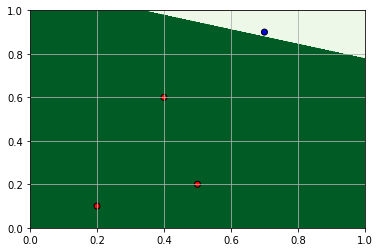

In [30]:
import numpy as np

#x_min , x_max = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
#y_min , y_max = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1

x_min , x_max= 0, 1 
y_min , y_max = 0, 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.002),np.arange(y_min,y_max,0.002)) #0.2 is step
#print(xx,'\n',yy)
#print(xx.ravel(),'\n',yy.ravel())
#print(np.c_[xx.ravel(),yy.ravel()])

Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
#print(Z)

color_map = {0:(0,0,0.9), 1:(1,0,0)}
colors = [color_map[y] for y in df['bprediction']]

Z = Z.reshape(xx.shape)
print(xx,"\n",yy,"\n",Z)

plt.contourf(xx, yy , Z, cmap=plt.cm.Greens)
plt.axis([0,1,0,1])
plt.scatter(df['sleep_proportion'],df['grumpy_proportion'],c = colors, edgecolors = 'black')
plt.grid()

In [32]:
#np.meshgrid([0.2,0.3],[0.4,0.5])

# Support Vector machine
- The goal of a support vector machine is to find the optimal separating hyperlane which maximizes the margin of the training data.

In [34]:
from sklearn.svm import SVC
SVCClassifier = SVC(kernel='linear',C=10,max_iter=100)

SVCModel = SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']], df['bprediction'])

[ True False]


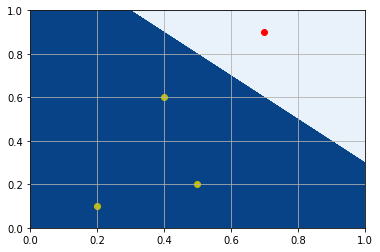

In [41]:
pred_input = np.c_[xx.ravel(),yy.ravel()]
SVC_Z = SVCModel.predict(pred_input)
SVC_Z = SVC_Z.reshape(xx.shape)

print(SVCModel.predict([[0,0],[1,1]]))

plt.contourf(xx,yy,SVC_Z,cmap=plt.cm.Blues)
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],c='y', label='kittens')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'], c='r',label='adults')

plt.axis([0,1,0,1])
plt.grid()